# Startup study

#### Problem :  To determine the best factors for startups to invest in

In [47]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
df = pd.read_csv('50_Startups.csv')

In [49]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [50]:
df.info() # data shows 50 startups from different states of US

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [51]:
df.shape

(50, 5)

Target variable : Profit

In [52]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Exploratory Data Analysis

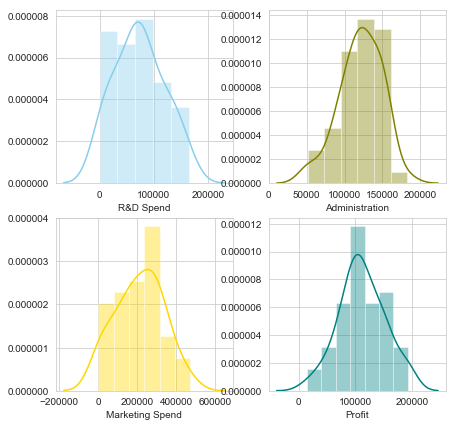

In [53]:
sb.set_style('whitegrid')
f, axes = plt.subplots(2,2,figsize = (7,7))
sb.distplot(df['R&D Spend'],color = 'skyblue',ax = axes[0,0])
sb.distplot(df['Administration'],color = 'olive',ax = axes[0,1])
sb.distplot(df['Marketing Spend'],color = 'gold',ax = axes[1,0])
sb.distplot(df['Profit'],color = 'teal',ax = axes[1,1])

R&D Spend : Most of the startups spend less then 1 lakh 

Administration Spend : Most of the startups spend between 1 lakh - 1.7 lakh

Marketing Spend : More number of startups spend less then 3.5 lakh and very less above 4 lakh

profit : On an average most startups were able to get profit of around 1 lakh.

<Figure size 864x648 with 0 Axes>

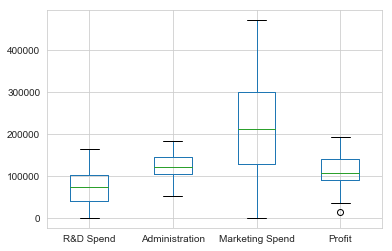

In [54]:
plt.figure(figsize=(12,9))
df.plot(kind = 'box')

Except marketing spend all other factors seem to be more consistent and marketing is more varying which is makes it less suitable for prediction

In [55]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


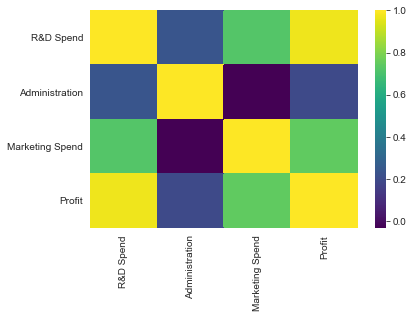

In [56]:
sb.heatmap(df.corr(),cmap='viridis')

R&D and Marketing are more correlated to the price 

In [57]:
# Split Data
X = df.iloc[:,:-1].values
Y = df.iloc[:,4].values

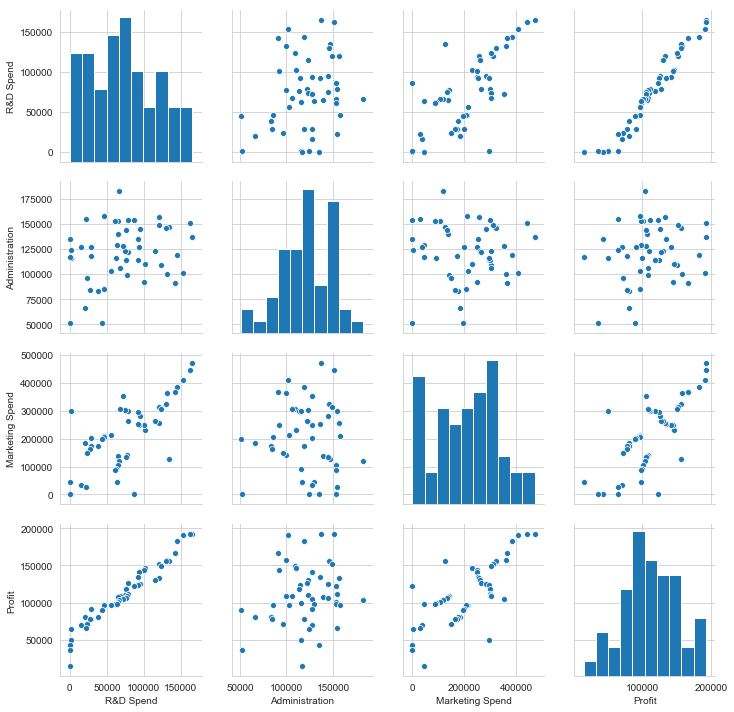

In [58]:
sb.pairplot(df)

In [59]:
# with this graphs R&D spend is more correlated with profit given by 0.97 cocoef 
# with this graphs Administration is less correlated with profit given by 0.2 cocoef 
# with this graphs marketing is more correlated with profit given by 0.74 cocoef 

### Data Munging

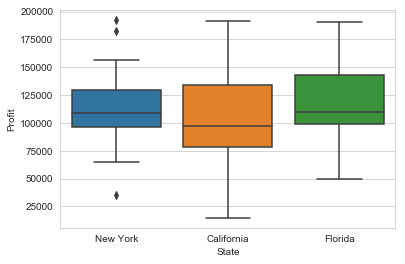

In [60]:
# Categorical column : state correlation with price
sb.boxplot(df['State'],df['Profit'])

In [61]:
# In Newyork not many companies are profitable due to outliers.
# In california many companies are in medium profitable range with more no of companies loacted here which have seen both
# low profit margin as well as high profit margin than any of the cities.
# Florida  many companies are in mediaum profitable range

In [62]:
# so all features irrespective of  there correlation needs to be considered

In [63]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
state_label = LabelEncoder()

In [64]:
# Conversion of categorical data to  binary format
X[:,3] = state_label.fit_transform(X[:,3])
X[:,3] # 2: Newyork, 0 : California, 1 : Florida

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0], dtype=object)

In [65]:
import warnings
warnings.filterwarnings('ignore')
# Encoding of categorical data
onehotencoder = OneHotEncoder(categorical_features=[3])

In [66]:
X[:5,:]

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1]], dtype=object)

In [67]:
X = onehotencoder.fit_transform(X).toarray()
X.shape

(50, 6)

In [68]:
X[:5,:]

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05]])

In [69]:
# Avoid dummy variable trap
X = X[:,1:]

In [70]:
X.shape

(50, 5)

### Train Test Split

In [71]:
# Train test split with 80/20 ration of training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [72]:
x_train.shape

(40, 5)

In [73]:
y_train.shape

(40,)

## Regression model

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [75]:
# Model fit
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
# Test Score
model.score(x_test,y_test)

0.8202420901286431

In [77]:
y_pred = model.predict(x_test)

##  Backward Elimination

In [78]:
import statsmodels.formula.api as sm

In [79]:
X = np.append(arr = np.ones((50,1)).astype(int),values=X,axis = 1)
X.shape

(50, 6)

In [80]:
X_opt = X[:,[0,1,2,3,4,5]]
X_opt[:3,:]

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05]])

In [81]:
regress_ols = sm.OLS(endog= Y,exog=X_opt).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           1.34e-27
Time:                        14:02:43   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
# X2 is the least significant factor which is to be removed as its p value > 0.05

In [83]:
X_opt = X[:, [0,1,3,4,5]]
regress_ols = sm.OLS(endog= Y,exog=X_opt).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           8.49e-29
Time:                        14:03:03   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
#remove x1

In [85]:
X_opt = X[:, [0,3,4,5]]
regress_ols = sm.OLS(endog= Y,exog=X_opt).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           4.53e-30
Time:                        14:03:33   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

remove x2

In [86]:
X_opt = X[:, [0,3,5]]
regress_ols = sm.OLS(endog= Y,exog=X_opt).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           2.16e-31
Time:                        14:14:32   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
# remove x2 as its p value > 0.05

In [88]:
X_opt = X[:, [0,3]]
regress_ols = sm.OLS(endog= Y,exog=X_opt).fit()
regress_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           3.50e-32
Time:                        14:15:26   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion : Marketing and R&d are most importatnt factors contributing to profit